# Two Samples Behaviour Analysis
---
Determine whether two samples belong to the same population. Bootstrap, Analysis and Visualization.

### Imports

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### EDA

**count:** number of orders made by a specific customer in a given timeframe (t0 - t2].<br>
**result:** Delivery performance, either 1 or 0.<br>
**ltv:** Life Time Value prediction.<br>
**real:** Real Number of orders ordered by a customer in a given timeframe (t2 - t5].<br>

We want to determine whether a bad perfomance (0) has an effect imparing further orders bringing the life time value and real orders value closer to zero. 

To carry out this analysis, users will be grouped by the number of orders they made during the experiment period, 'count' column.

In [38]:
df = pd.read_csv("MyData/data.csv")
df.head(5)

,count,result,ltv,real
0,1,0,14.0,6.0
1,2,0,12.0,33.0
2,1,0,14.0,22.0
3,1,0,3.0,0.0
4,1,0,2.0,1.0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15691 entries, 0 to 15690
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   count   15691 non-null  int64  
 1   result  15691 non-null  int64  
 2   ltv     15691 non-null  float64
 3   real    15691 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 490.5 KB


In [40]:
df.describe()

,count,result,ltv,real
count,15691.000000,15691.000000,15691.000000,15691.000000
mean,1.579377,0.311198,13.934039,13.782933
std,1.040845,0.462998,13.841580,15.791432
min,1.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,5.000000,3.000000
50%,1.000000,0.000000,10.000000,9.000000
75%,2.000000,1.000000,19.000000,18.000000
max,5.000000,1.000000,269.000000,232.000000


In [41]:
df.groupby(by=["count", "result"]).count()

ltv  real
count result            
1     0       7025  7025
      1       3668  3668
2     0       2039  2039
      1        704   704
3     0        847   847
      1        226   226
4     0        426   426
      1        100   100
5     0        471   471
      1        185   185

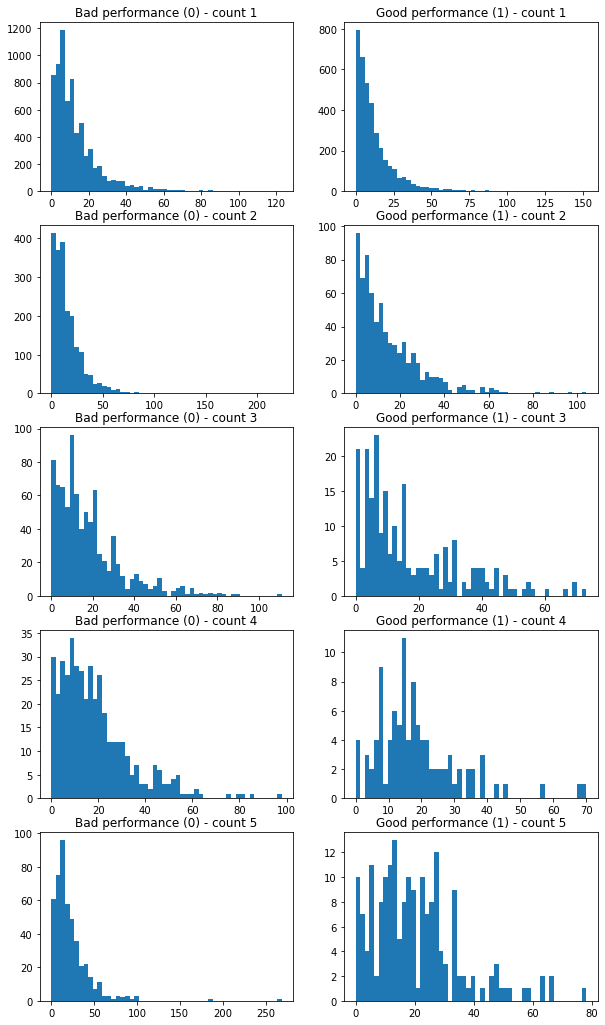

In [42]:
fig, axes = plt.subplots(5,2, figsize=(10,18))
for indx, couple in enumerate(axes):
    bad = df[(df["count"] == indx +1) & (df["result"] == 0)]["ltv"].values
    good = df[(df["count"] == indx +1) & (df["result"] == 1)]["ltv"].values
    
    couple[0].hist(bad, bins=50)
    couple[1].hist(good, bins=50)
    
    couple[0].set_title(f"Bad performance (0) - count {indx +1}")
    couple[1].set_title(f"Good performance (1) - count {indx +1}")

**EDA Conlcusions**

We have an insufficient amount of observations. The data is not evenly split by performance, we have more than double of negative observations (0) than positive ones (1). By plotting the values, we observe that every group is skewed to the right.

To solve these issues we will use a statistical procedure called bootstrapping. This process generates new data using the already existing sample. It will also remove the skewness by shaping the data into a normal distributed sample.  

### Bootstrapping - How it works

In order to understand how bootstrapping works, let's analyse two examples, in both cases we will use fake data. The population size is 100.000 items while each sample will only have 1.000 observations.

In [155]:
# Setting fake data

group1 = np.random.normal(25, 2, 100000)
group2 = np.random.normal(27, 2, 100000)

gr1_sample1 = np.random.choice(group1, size=1000)
gr1_sample2 = np.random.choice(group1, size=1000)

gr2_sample1 = np.random.choice(group2, size=1000)
gr2_sample2 = np.random.choice(group2, size=1000)

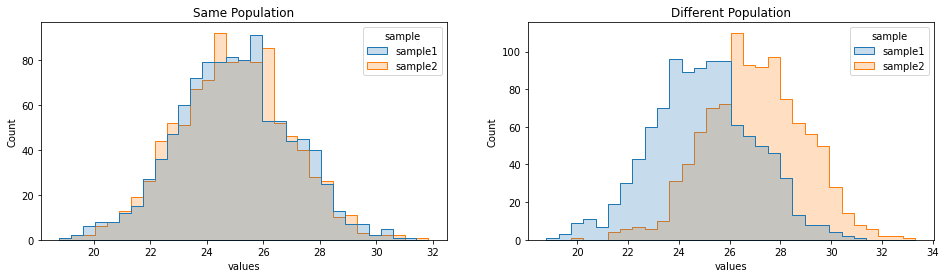

In [156]:
# Visualization

# Example 1. Same population.

df_g1 = pd.DataFrame(gr1_sample1, columns=["sample1"])
df_g2 = pd.DataFrame(gr1_sample2, columns=["sample2"])
full = df_g1.join(df_g2)
same_pop = pd.melt(full, var_name="sample", value_name="values")

# Example 1. Different population.

df_g1 = pd.DataFrame(gr1_sample1, columns=["sample1"])
df_g2 = pd.DataFrame(gr2_sample1, columns=["sample2"])
full = df_g1.join(df_g2)
diff_pop = pd.melt(full, var_name="sample", value_name="values")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,4))
sns.histplot(data=same_pop, x="values", hue="sample", element="step", ax=axes[0])
sns.histplot(data=diff_pop, x="values", hue="sample", element="step", ax=axes[1])
axes[0].set_title("Same Population")
axes[1].set_title("Different Population");

When the both samples are coming from the same population, the mean and median difference should be closer to zero. The bigger the difference the more different the populations are.

**Example 1. Same population**

In [157]:
# Mean

gr1_sample1_mean = np.mean(gr1_sample1)
gr1_sample2_mean = np.mean(gr1_sample2)
print(gr1_sample1_mean, gr1_sample2_mean)

mean_diff_same = abs(gr1_sample1_mean - gr1_sample2_mean)
print(mean_diff_same)

24.948035546550184 24.926058071220215
0.021977475329968854


In [158]:
# Median

gr1_sample1_median = np.median(gr1_sample1)
gr1_sample2_median = np.median(gr1_sample2)
print(gr1_sample1_median, gr1_sample2_median)

median_diff_same = abs(gr1_sample1_median - gr1_sample2_median)
print(median_diff_same)

24.934433717989293 24.925197562323746
0.009236155665547585


As expected, both the median and mean absolute difference values are close to zero. Thus, we might infer the samples come from the same population.

**Exmaple 2. Different population.**

In [159]:
# Mean

gr1_sample1_mean = np.mean(gr1_sample1)
gr2_sample1_mean = np.mean(gr2_sample1)
print(gr1_sample1_mean, gr2_sample1_mean)

mean_diff_diff = abs(gr1_sample1_mean - gr2_sample1_mean)
print(mean_diff_diff)

24.948035546550184 26.997807706666105
2.0497721601159213


In [160]:
# Median

gr1_sample1_median = np.median(gr1_sample1)
gr2_sample1_median = np.median(gr2_sample1)
print(gr1_sample1_median, gr2_sample1_median)

median_diff_diff = abs(gr1_sample1_median - gr2_sample1_median)
print(median_diff_diff)

24.934433717989293 26.987343500946515
2.0529097829572223


Since populations are not the same, mean and median absolute difference won't zero. The higher this value the more difference there is between the two samples, therefore, the more different populations will be.

**Bootstrap Implementation**

Our samples only account for 1% of the total population (1.000 out of 100.000). The previous excersise gives us an idea if there is a difference between the samples, but in order to ensure the samples' provenance with a greater level of certainty we should perform a t-test or any other similar test. 

In this case we will use a simple bootstarp p-value analysis. To carry out this test we should compute the mean between both samples. Then create and compute the difference between the bootstrap samples, the more the better. Lastly, add up the number of bootstraps tests which mean is higher than the original sample mean, and divide that number by the total number of bootstrap test. The resulting value is the p-value.

We will set our confindence level at 0.05. This means that any value higher than 0.05 will mean that we are dealing with samples coming from the same population.

In [161]:
def bootstrap(sample1, sample2, n_iterations):
    """
    Create a bootstrap copy of two arrays returning the new groups' mean and median.
    
    Parameters:
        sample1: NumPy Array. 1 dimension array (X,). Both samples must have the same dimension and items.
        sample2: NumPy Array. 1 dimension array (X,). Both samples must have the same dimension and items.
        n_iterations: Integer. Number of bootstrap samples to compute.
        
    Return:
        List: Mean, Median and Absolute difference computed for each iteration.
    """
    
    results = []
    
    for x in range(n_iterations):
        # Join both samples together. Our null hypotheses is that both samples come from the same distribution.
        full = np.concatenate((sample1, sample2))
        
        # Randomly choose full.size items with replacement, full.size = sample1.size + sample2.size
        # replace=True means with replacement i.e. a given element 'a' can be chosen multiple times.
        bootstrap_sample = np.random.choice(full, size=full.size, replace=True)

        boot_sample1 = bootstrap_sample[:sample1.size]
        boot_sample2 = bootstrap_sample[sample1.size:]

        # Computing mean and median
        boot_sample1_mean = np.mean(boot_sample1)
        boot_sample2_mean = np.mean(boot_sample2)
        boot_sample1_median = np.median(boot_sample1)
        boot_sample2_median = np.median(boot_sample2)

        # Computing difference
        mean_diff = abs(boot_sample1_mean - boot_sample2_mean)
        median_diff = abs(boot_sample1_median - boot_sample2_median)
        
        # Crearing list with results
        result = [x+1, 
                  boot_sample1_mean, boot_sample2_mean, 
                  boot_sample1_median, boot_sample2_median, 
                  mean_diff, median_diff]
        
        results.append(result)
    
    return results

In [162]:
def bootstrap_pvalue(obs_value, bootstrap_values):
    """
    Compute the p value given a X number of bootstraps observations.
    Formula >> (# bootstraps tests >= observed test ) / # bootstrap tests 
    The lower this value the better.
    
    Parameters:
        obs_value: Integer. Statistic such as Mean or Median.
        bootstrap_values: List or NumPy array. List of bootstrap statistics to compare with.
    
    Return:
        Float. P value.    
    """
    
    bigger = [ob for ob in bootstrap_values if ob >= obs_value]
    pvalue = len(bigger) / len(bootstrap_values)
    return pvalue

**Example 1. Same Population**

In [163]:
same_pop_boot = bootstrap(gr1_sample1, gr1_sample2, 100)
cols = ["Sample_no", "mean1", "mean2", "median1", "median2", "mean_diff", "median_diff"]
bootstrap_df = pd.DataFrame(data=same_pop_boot, columns=cols)
bootstrap_df.head()

,Sample_no,mean1,mean2,median1,median2,mean_diff,median_diff
0,1,24.919975,24.884971,24.925086,24.891042,0.035004,0.034044
1,2,24.957923,24.973492,25.011517,24.910424,0.015569,0.101093
2,3,24.931148,24.977149,24.933832,24.917487,0.046001,0.016345
3,4,24.963340,25.060772,24.921996,24.957196,0.097433,0.035200
4,5,25.044574,24.926789,24.946738,24.947890,0.117785,0.001152


In [164]:
bootstrap_pvalue(mean_diff_same, bootstrap_df["mean_diff"])

0.84

As expected, the value is way higher than 0.05. Both samples are coming from the same population.

**Example 2. Different Population**

In [165]:
diff_pop_boot = bootstrap(gr1_sample1, gr2_sample1, 100)
cols = ["Sample_no", "mean1", "mean2", "median1", "median2", "mean_diff", "median_diff"]
bootstrap_df = pd.DataFrame(data=diff_pop_boot, columns=cols)
bootstrap_df.head()

,Sample_no,mean1,mean2,median1,median2,mean_diff,median_diff
0,1,26.063087,26.134179,26.008283,26.202079,0.071093,0.193797
1,2,25.974799,25.875646,25.983729,25.828800,0.099153,0.154929
2,3,25.881646,26.078244,25.877700,26.113757,0.196599,0.236057
3,4,26.075022,25.969670,26.069191,26.017002,0.105352,0.052189
4,5,25.873092,26.096043,25.935793,25.944914,0.222951,0.009121


In [166]:
bootstrap_pvalue(mean_diff_diff, bootstrap_df["mean_diff"])

0.0

As expected, the value is smaller than 0.05. Samples are comming from different populations.

### Real World Data

----- 1


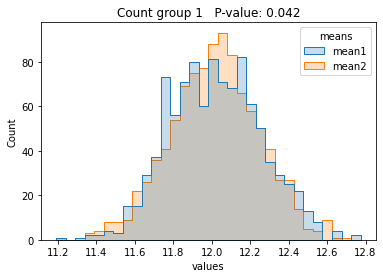

----- 2


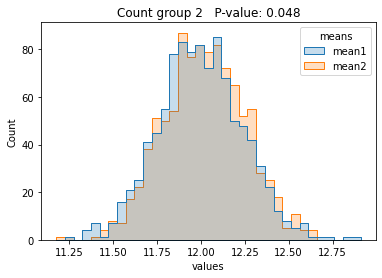

----- 3


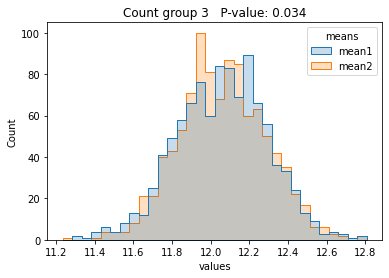

----- 4


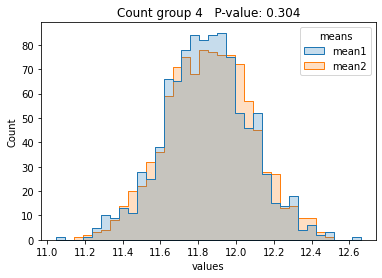

----- 5


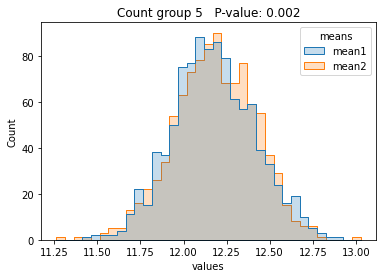

In [264]:
for x in [1,2,3,4,5]:
    
    print("-----", x)
    
    # Identifying smallest group
    grp_good = df[(df["count"] == group_count) & (df["result"] == 1)]["real"].values
    grp_bad = df[(df["count"] == group_count) & (df["result"] == 0)]["real"].values
    min_val = min(len(grp_good), len(grp_bad))
    
    # Creating groups and computing mean
    grp_good = np.random.choice(grp_good, size=min_val, replace=False)
    grp_bad = np.random.choice(grp_bad, size=min_val, replace=False)
    mean_diff = abs(grp_good.mean() - grp_bad.mean())
    
    # Bootstrapping
    boot_perf = bootstrap(grp_good, grp_bad, 1000)
    cols = ["Sample_no", "mean1", "mean2", "median1", "median2", "mean_diff", "median_diff"]
    bootstrap_df = pd.DataFrame(data=boot_perf, columns=cols)
    
    # Bootstrapping P-value
    p_val = bootstrap_pvalue(mean_diff, bootstrap_df["mean_diff"])
    
    # Visualization
    to_hist = bootstrap_df[["mean1", "mean2"]].melt(var_name="means", value_name="values")
    fig, ax = plt.subplots(figsize=(6,4))
    sns.histplot(data=to_hist, x="values", hue="means", element="step", ax=ax)
    ax.set_title(f"Count group {x}   P-value: {p_val}")
    plt.show()
